<a href="https://colab.research.google.com/github/Rudraksh31/Capstone/blob/main/ASL_model_Valiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_size = 224
batch_size = 32
epochs = 15
train_path = '/content/drive/MyDrive/archive/train'
test_path = '/content/drive/MyDrive/archive/test'

In [6]:
augment_train_data = ImageDataGenerator(horizontal_flip=True,
                                        rotation_range=50,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255)
augment_test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = augment_train_data.flow_from_directory(train_path,
     shuffle=True,
     classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
     'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space','del', 'nothing'],
     target_size=(img_size, img_size),
     batch_size=batch_size)
test_dataset = augment_train_data.flow_from_directory(test_path,
     classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
     'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space','del', 'nothing'],
     target_size=(img_size, img_size),
     batch_size=batch_size)

Found 27999 images belonging to 29 classes.
Found 4200 images belonging to 29 classes.


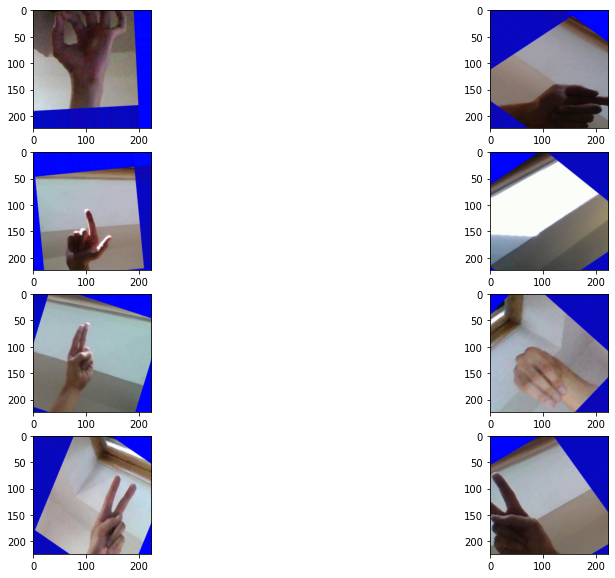

In [ ]:
fig = plt.figure(figsize=(15, 10))
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.imshow(train_dataset[0][0][i-1])
plt.show()


In [ ]:
# getting pretrained model for transfer learning and defining model
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
download_model = hub.KerasLayer(url,input_shape=(224,224,3))
model = Sequential([
     download_model,
     Dense(28),
     Activation("softmax")
])

In [ ]:
# compiling model
model.compile(optimizer=Adam(1e-3),
loss="categorical_crossentropy",
metrics=['accuracy'])


In [ ]:
#training model
print("\n Model summary: ")
print(model.summary())
print("\n Model Training: ")
model.fit(train_dataset,
batch_size=batch_size,
epochs=epochs)


In [ ]:
# evaluating model
print("\n Model Evaluation: ")
model.evaluate(test_dataset)



 Model Evaluation: 
32/32 [==============================] - 283s 9s/step - loss: 0.4719 - accuracy: 0.8590


[0.471879243850708, 0.859000027179718]

In [ ]:
# saving model
model.save("/content/drive/My Drive/archive/h5/asl_model.h5")


In [ ]:
# saving model
model.save("/content/drive/My Drive/archive/ASL_model/asl_model")

INFO:tensorflow:Assets written to: /content/drive/My Drive/archive/ASL_model/asl_model/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/archive/ASL_model/asl_model/assets


In [4]:
# loading saved model
load_model = tf.keras.models.load_model("/content/drive/MyDrive/archive/ASL_model/asl_model_better",custom_objects={"KerasLayer":hub.KerasLayer})
print(load_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_1 (Dense)             (None, 29)                29058     
                                                                 
 activation_1 (Activation)   (None, 29)                0         
                                                                 
Total params: 3,569,323
Trainable params: 29,058
Non-trainable params: 3,540,265
_________________________________________________________________
None


In [13]:
test_dataset = augment_train_data.flow_from_directory(test_path,
     classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
     'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space','del', 'nothing'],
     target_size=(img_size, img_size),
     batch_size=batch_size)

Found 4200 images belonging to 29 classes.


In [ ]:
print("\n Model Evaluation: ")
load_model.evaluate(test_dataset)


 Model Evaluation: 
132/132 [==============================] - 2674s 20s/step - loss: 0.4350 - accuracy: 0.8679


[0.43497511744499207, 0.8678571581840515]

Validating

In [9]:
test_path1 = "/content/drive/MyDrive/archive/asl_alphabet_test/asl_alphabet_test"
test_dataset1 = augment_train_data.flow_from_directory(test_path1,
     classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
     'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space','del', 'nothing'],
     target_size=(img_size, img_size),
     batch_size=batch_size)

Found 28 images belonging to 29 classes.


In [10]:
print("\n Model Evaluation: ")
load_model.evaluate(test_dataset1)


 Model Evaluation: 
1/1 [==============================] - 1s 518ms/step - loss: 0.1821 - accuracy: 0.9643


[0.1821390837430954, 0.9642857313156128]

In [11]:
test_dataset2 = augment_train_data.flow_from_directory(train_path,
     shuffle=True,
     classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
     'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space','del', 'nothing'],
     target_size=(img_size, img_size),
     batch_size=batch_size)

Found 27999 images belonging to 29 classes.


In [12]:
print("\n Model Evaluation: ")
load_model.evaluate(test_dataset2)


 Model Evaluation: 
875/875 [==============================] - 8379s 10s/step - loss: 0.4385 - accuracy: 0.8654


[0.43852755427360535, 0.8654237389564514]